# **Clase 2**

###**Practico 1**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
edgeList = [[0,2], [1,3], [2,3], [2,4], [3,5], [4,5]]

adjMatrix = np.zeros(shape=(6,6))
for nodo in edgeList:
  x = nodo[0]
  y = nodo[1]
  adjMatrix[x,y] = 1
print(np.asarray(adjMatrix))

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
adjLista  = []
for nodo, nodoAux in edgeList:
    adjLista.append([])
    adjLista[nodo].append(nodoAux)
print(adjLista)

[[2], [3], [3, 4], [5], [5], []]


##**Ejercicio 1**
Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [ ]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

     |████████████████████████████████| 51kB 1.6MB/s 


In [ ]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")
kickstarter_2018[:5]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
kickstarter_2018_name = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])
kickstarter_2018_name[:5]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
# Dataset con registros de nombres duplicados
# Buscamos nuevamente si hay datos duplicados
kickstarter_2018_duplidacos = kickstarter_2018_name[kickstarter_2018_name.name.duplicated(keep=False)]
kickstarter_2018_duplidacos.sort_values(['name'])
kickstarter_2018_duplidacos[:5]


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000940032,Space Trucker,Video Games,Games,USD,2016-12-08,150.0,2016-11-08 08:20:27,165.0,successful,7,US,25.00,165.00,150.00
1001052357,Spilt Milk,Graphic Novels,Comics,AUD,2017-01-08,18000.0,2016-12-09 04:00:31,832.0,failed,23,AU,375.22,623.55,13490.22
1001110351,Kingdoms of Erden: King of the Mountain,Tabletop Games,Games,USD,2017-07-27,1000.0,2017-06-26 15:52:31,745.0,canceled,52,US,316.00,745.00,1000.00
10018239,Borders,Drama,Film & Video,GBP,2016-04-08,3500.0,2016-02-25 17:40:34,40.0,failed,2,GB,55.93,56.30,4926.39
1002139540,The Kindness of Strangers,Nonfiction,Publishing,USD,2014-09-15,3021.0,2014-08-31 20:40:19,113.0,failed,5,US,113.00,113.00,3021.00


##**Ejercicio 2** 


In [ ]:
from hashlib import md5
def hashit(val):
    if isinstance(val, float): 
        return str(val) 
    return md5(val.encode('utf-8')).hexdigest()

kickstarter_2018['hashed_name'] = kickstarter_2018['name'].astype(str).apply(hashit)

ks_duplicado_n_hn = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
ks_duplicado_n_hn  = ks_duplicado_n_hn .sort_values(by='name')[['name', 'hashed_name']]
ks_duplicado_n_hn 

,name,hashed_name
342920,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
342692,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
2024,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
322671,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
173036,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
...,...,...
247646,xxx (Canceled),930857c212f21166427b23d4a7fe52a3
166851,NaN,a3d2de7675556553a5f08e4c88d2c228
307234,NaN,a3d2de7675556553a5f08e4c88d2c228
309991,NaN,a3d2de7675556553a5f08e4c88d2c228


# **Clase 3**

## **Ejercicio 3**

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1

In [ ]:
import ftfy.badness as bad
def weird(val):
  
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018_iso_8859_1 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
kickstarter_2018_iso_8859_1['name_weirdness'] = kickstarter_2018_iso_8859_1['name'].apply(weird)
print('Cant. de registros en `kickstarter_2018` sin cambiar encoding: => {}'.format(len(kickstarter_2018[kickstarter_2018.name_weirdness > 1])))
print('Cant. de registros en `kickstarter_2018` con encoding ISO-8859-1: => {}'.format(len(kickstarter_2018[kickstarter_2018_iso_8859_1.name_weirdness > 1])))

Cant. de registros en `kickstarter_2018` sin cambiar encoding: => 26
Cant. de registros en `kickstarter_2018` con encoding ISO-8859-1: => 7682


## **Ejercicio 4**
Codificar currency con ambas estrategias

In [ ]:
from sklearn import preprocessing
kickstarter_2018.describe(include=['O'])



In [ ]:
column='main_category'
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018[column])

LabelEncoder()

In [ ]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [ ]:
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hashed_name,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524,0
2,1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [ ]:
column='currency'
le = preprocessing.LabelEncoder()

le.fit(kickstarter_2018[column])

LabelEncoder()

In [ ]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [ ]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## **Ejercicio 5**

¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [25]:
#Proyectos que son 'successful0, pero con 'pledged'<'goal'
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hashed_name,name_weirdness
72483,1368992939,Santa's Sled,Art,0,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,92f6e4970773ace6a1a5834f969aa063,0
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,6,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,a9df06a2771d5b16d9bc1565e01d6f74,0
232422,251325270,Documentary film about Les Blank.,Documentary,6,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,8d98ff9795b5f284d716f851e41e344a,0
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,0,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,c746e76b03e0b8a1fa80816821f7ebb7,0
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,4,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,61e9a198771a6c2b2ae6fb50d96eccbe,0


In [27]:
Porcentaje = 100/(kickstarter_2018.state == 'successful').sum() * ((kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)).sum()
print('Objetivo conseguido  : %2.2f %%' %Porcentaje)
print('bjetivo o conseguido : %2.2f %%' %(100-Porcentaje))

Objetivo conseguido  : 96.97 %
bjetivo o conseguido : 3.03 %


Tabla con la cantidad de proyectos por categoría principal y estado.

In [ ]:
kickstarter_2018.pivot_table(values='currency',index='state',columns='main_category', aggfunc='count')

main_category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
state,,,,,,,,,,,,,,,
canceled,2222.0,842.0,843.0,163.0,4152.0,2650.0,5755.0,2211.0,6202.0,523.0,3305.0,986.0,3602.0,4715.0,608.0
failed,14131.0,4036.0,5703.0,1235.0,14814.0,14182.0,32904.0,15969.0,16003.0,3137.0,21752.0,6384.0,23145.0,20616.0,3708.0
live,194.0,76.0,76.0,18.0,305.0,250.0,332.0,184.0,287.0,31.0,281.0,48.0,299.0,377.0,41.0
successful,11510.0,5842.0,2115.0,2338.0,10550.0,5593.0,23623.0,6085.0,12518.0,1012.0,24197.0,3305.0,12300.0,6434.0,6534.0
suspended,96.0,23.0,72.0,13.0,247.0,138.0,117.0,153.0,220.0,52.0,149.0,55.0,66.0,424.0,21.0
undefined,NaN,NaN,NaN,1.0,2.0,3.0,854.0,NaN,1.0,NaN,2234.0,1.0,462.0,3.0,1.0


## **Ejercicio 6**

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

2.7. Evaluar cómo comprimir los datos

In [32]:
outliers2 = kickstarter_2018[(np.abs(kickstarter_2018.usd_goal_real 
                                       - kickstarter_2018.usd_goal_real.mean()) <= (3 * kickstarter_2018.usd_goal_real.std()))]
outliers2
print('Cantidad de outliers (usd_goal_real)', len(outliers2))
outliers2

Cantidad de outliers (usd_goal_real) 378289


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hashed_name,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524,0
2,1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,6,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,d89228576343394467096843057f3aa4,0
378657,999977640,The Tribe,Narrative Film,6,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,bbcb30bd9bd4f9bff0a96fc44d0001f0,0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,6,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,6c3094666e1a315b6e179566fe3972d9,0
378659,999987933,BioDefense Education Kit,Technology,13,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,887be409ad8b93f26084845a41d4c178,0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

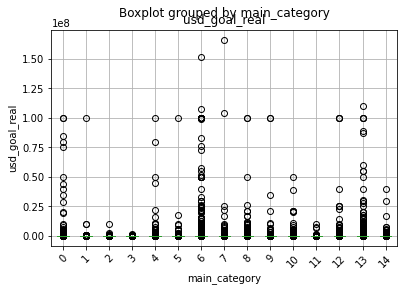

In [31]:

kickstarter_2018.boxplot(column='usd_goal_real',by='main_category');
plt.ylabel('usd_goal_real')
plt.xlabel('main_category')
plt.xticks(rotation=45)

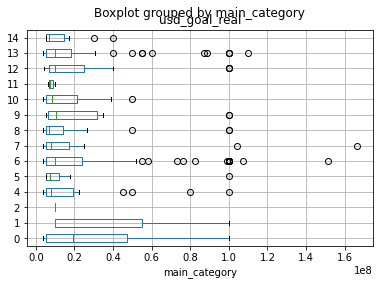

In [ ]:
#Boxplot de "usd_goal_real" sin outliers globales
kickstarter_2018.drop(outliers2.index).boxplot(column='usd_goal_real',by='main_category', vert=False);